In [22]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [46]:
folder = "/Users/jacquelinezhu/Desktop/SleepdB/acoustic_project/04162025_05142025"
input = os.path.join(folder, "AcousticFeatures_April16_May14_soo_scaled.xlsx")
df = pd.read_excel(input).dropna(how='all')
x = df.loc[:, 'shEnt':'PXX_diff_SMA']
y = df['AHI']

In [47]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)  

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models
#import tensorflow as tf
#from tensorflow.keras import layers, models

In [66]:
model = models.Sequential()
model.add(Dense(32,input_dim=x_train.shape[1], activation='relu'))
#model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=300)

Epoch 1/300


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.7709 - mae: 1.0428 
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4109 - mae: 0.9308
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1940 - mae: 0.8584
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0260 - mae: 0.7977
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8707 - mae: 0.7361
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7800 - mae: 0.6891
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7011 - mae: 0.6556
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6345 - mae: 0.6266
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5874 - mae: 0.6008
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5327 - mae: 0.5709
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4959 - mae: 0.5478
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4568 - mae: 0.5239
Epoch 13/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0

In [67]:
y_model_train = model.predict(x_train) # use this x output to predict the y data
y_model_test = model.predict(x_test)

print(r2_score(y_train, y_model_train))
print(r2_score(y_test, y_model_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
0.9999999999999301
-1.8875864504861428


Text(0.5, 1.0, 'MLP Model Predictions')

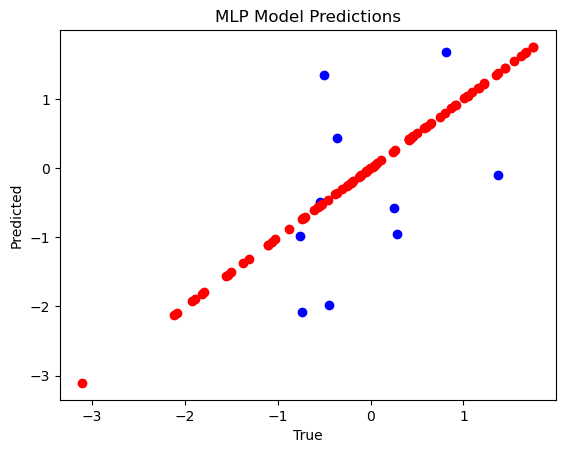

In [68]:
plt.plot(y_test, y_model_test, 'bo')
plt.plot(y_train, y_model_train, 'ro')

plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("MLP Model Predictions")

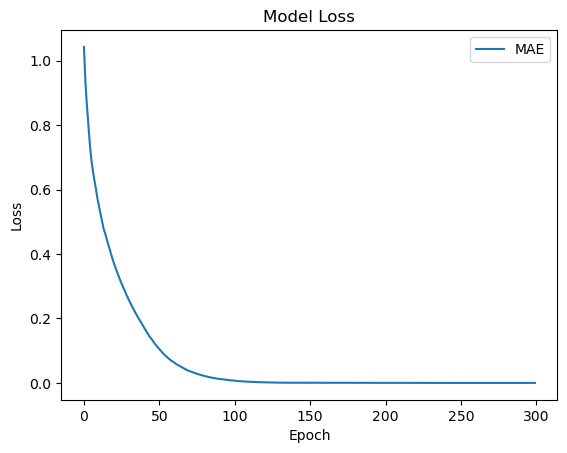

In [69]:
plt.plot(history.history['mae'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper right')

In [57]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
for i,j in kf.split(x):
    Xtr, Xte = x[i], x[j]
    ytr, yte = y[i], y[j]
    model = model(Xtr.shape[1], width=32, depth=1, activation='relu')
    model.fit(Xtr, ytr, validation_split=0.2, epochs=300, batch_size=16)

    yte_pred = model.predict(Xte)
    r2s.append(r2_score(yte, yte_pred))

print(r2s)

KeyError: "None of [Index([ 0,  1,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21,\n       22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 41, 43, 44,\n       45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66,\n       67, 69, 70, 71, 74, 75, 76, 77, 78, 80, 81, 83, 84, 85, 86, 87, 88, 89,\n       92, 93, 94, 95, 96, 97, 98, 99],\n      dtype='int64')] are in the [columns]"

In [27]:
imp = SimpleImputer(strategy='median')
sc = StandardScaler()

Xtr = imp.fit_transform(x_train)
Xtr = sc.fit_transform(Xtr)

Xte = imp.transform(x_test)
Xte = sc.transform(Xte)

In [ ]:
def model1(input_dim, width=32, depth=1, activation='relu'):
    inputs = layers.Input(shape=(input_dim,))
    for _ in range(depth):
        x = layers.Dense(width, activation=activation)(inputs)
    outputs = layers.Dense(1, activation='linear')(x)
    model = models .Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [37]:
model = model1(Xtr.shape[1], width=32, depth=1, activation='relu')
history = model.fit(Xtr, y_train, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 767ms/step - loss: 1100.8325 - mae: 25.8453 - val_loss: 2136.9175 - val_mae: 38.5381
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1094.3064 - mae: 25.7479 - val_loss: 2136.3687 - val_mae: 38.5008
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1088.4449 - mae: 25.6520 - val_loss: 2135.6086 - val_mae: 38.4630
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1082.5425 - mae: 25.5586 - val_loss: 2134.7900 - val_mae: 38.4241
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 1077.1111 - mae: 25.4727 - val_loss: 2133.8687 - val_mae: 38.3853
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 1071.3806 - mae: 25.3840 - val_loss: 2132.4602 - val_mae: 38.3445
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1066.1543 - mae: 25.2971 - val_loss: 2130.9038 - val_mae: 38.3028
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1060.3978 - mae: 25.2037 - val_loss: 2129.0918 - val_mae: 38.2597
Epo